In [1]:
import pandas as pd
import numpy as np
import missingno as msno

In [2]:
stats = pd.read_csv('data/player_mvp_stats.csv')

In [3]:
stats

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Pts Max,Share,W,L,W/L%,GB,PS/G,PA/G,SRS,Team
0,0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,...,0.0,0.0,58,24,0.707,5.0,106.3,99.6,6.73,Los Angeles Lakers
1,1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,...,0.0,0.0,58,24,0.707,5.0,106.3,99.6,6.73,Los Angeles Lakers
2,2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,...,0.0,0.0,58,24,0.707,5.0,106.3,99.6,6.73,Los Angeles Lakers
3,3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,...,0.0,0.0,58,24,0.707,5.0,106.3,99.6,6.73,Los Angeles Lakers
4,4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,...,0.0,0.0,58,24,0.707,5.0,106.3,99.6,6.73,Los Angeles Lakers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14692,14692,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,...,0.0,0.0,42,40,0.512,9.0,103.6,103.8,-0.45,Milwaukee Bucks
14693,14693,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,...,0.0,0.0,42,40,0.512,9.0,103.6,103.8,-0.45,Milwaukee Bucks
14694,14694,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,...,0.0,0.0,42,40,0.512,9.0,103.6,103.8,-0.45,Milwaukee Bucks
14695,14695,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,...,0.0,0.0,42,40,0.512,9.0,103.6,103.8,-0.45,Milwaukee Bucks


In [4]:
del stats['Unnamed: 0']

In [5]:
# Creating a separate dataframe for null_values
null = pd.DataFrame(stats.isnull().sum(), columns=['null_values'])

# Adding percent_missing column
null['percent_missing'] = (stats.isna().sum()/len(stats) * 100).round(2)

display(null[null['null_values'] > 0])

,null_values,percent_missing
FG%,59,0.40
3P%,2086,14.19
2P%,100,0.68
eFG%,59,0.40
FT%,521,3.54


<AxesSubplot:>

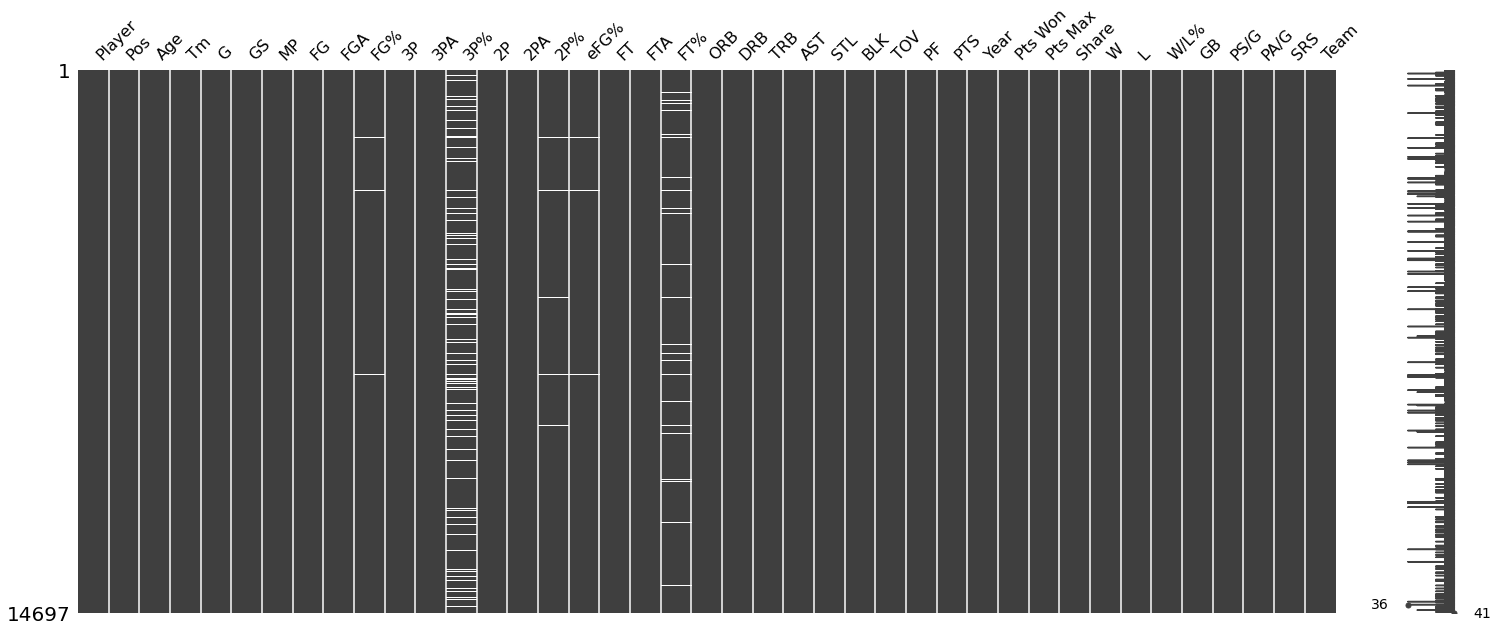

In [6]:
msno.matrix(stats)

In [7]:
stats = stats.fillna(0)

In [8]:
stats.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G',
       'SRS', 'Team'],
      dtype='object')

In [9]:
predictors = stats.select_dtypes(include=np.number).columns.tolist()

In [10]:
predictors.remove('Pts Won')
predictors.remove('Pts Max')
predictors.remove('Share')

In [11]:
predictors

['Age',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'Year',
 'W',
 'L',
 'W/L%',
 'GB',
 'PS/G',
 'PA/G',
 'SRS']

In [12]:
train = stats[stats['Year'] < 2022]

In [13]:
test = stats[stats['Year'] == 2022]

In [14]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=0.1)

In [15]:
reg.fit(train[predictors], train['Share'])

Ridge(alpha=0.1)

In [16]:
predictions = reg.predict(test[predictors])

In [17]:
predictions = pd.DataFrame(predictions, columns=['Predictions'], index=test.index)

In [18]:
predictions

,Predictions
648,0.012934
649,-0.028142
650,-0.006163
651,0.016564
652,-0.004820
...,...
12508,-0.019380
12509,-0.010196
12510,0.003810
12511,0.001162


In [19]:
combination = pd.concat([test[['Player', 'Share']], predictions], axis=1)

In [20]:
combination

,Player,Share,Predictions
648,Aaron Gordon,0.0,0.012934
649,Austin Rivers,0.0,-0.028142
650,Bol Bol,0.0,-0.006163
651,Bones Hyland,0.0,0.016564
652,Bryn Forbes,0.0,-0.004820
...,...,...,...
12508,Micah Potter,0.0,-0.019380
12509,Rodney McGruder,0.0,-0.010196
12510,Saben Lee,0.0,0.003810
12511,Saddiq Bey,0.0,0.001162


In [21]:
combination.sort_values('Share', ascending=False).head(10)

,Player,Share,Predictions
663,Nikola Jokić,0.875,0.190365
837,Joel Embiid,0.706,0.190462
11678,Giannis Antetokounmpo,0.595,0.219410
907,Devin Booker,0.216,0.091309
11469,Luka Dončić,0.146,0.157395
1179,Jayson Tatum,0.043,0.095902
12226,Ja Morant,0.010,0.120508
6398,Stephen Curry,0.004,0.093138
905,Chris Paul,0.002,0.078329
8241,LeBron James,0.001,0.157828


In [22]:
from sklearn.metrics import mean_squared_error

mean_squared_error(combination['Share'], combination['Predictions'])

0.0022401339173959227

In [23]:
combination['Share'].value_counts()

0.000    593
0.001      3
0.875      1
0.706      1
0.002      1
0.216      1
0.043      1
0.004      1
0.146      1
0.595      1
0.010      1
Name: Share, dtype: int64

In [24]:
combination = combination.sort_values('Share', ascending=False)
combination['Actual Rank'] = list(range(1, combination.shape[0] + 1))

In [25]:
combination

,Player,Share,Predictions,Actual Rank
663,Nikola Jokić,0.875,0.190365,1
837,Joel Embiid,0.706,0.190462,2
11678,Giannis Antetokounmpo,0.595,0.219410,3
907,Devin Booker,0.216,0.091309,4
11469,Luka Dončić,0.146,0.157395,5
...,...,...,...,...
3947,Nikola Vučević,0.000,0.052580,601
3948,Patrick Williams,0.000,-0.018656,602
3949,Tony Bradley,0.000,-0.010772,603
3950,Tristan Thompson,0.000,-0.009338,604


In [26]:
combination = combination.sort_values('Predictions', ascending=False)
combination['Predicted Rank'] = list(range(1, combination.shape[0] + 1))

In [27]:
combination

,Player,Share,Predictions,Actual Rank,Predicted Rank
11678,Giannis Antetokounmpo,0.595,0.219410,3,1
837,Joel Embiid,0.706,0.190462,2,2
663,Nikola Jokić,0.875,0.190365,1,3
8241,LeBron James,0.001,0.157828,10,4
11469,Luka Dončić,0.146,0.157395,5,5
...,...,...,...,...,...
12512,Trayvon Palmer,0.000,-0.057006,605,601
11821,Wes Iwundu,0.000,-0.066277,288,602
1216,Zavier Simpson,0.000,-0.066415,318,603
12495,Derrick Walton,0.000,-0.066490,215,604


In [28]:
combination.sort_values('Share', ascending=False).head(10)

,Player,Share,Predictions,Actual Rank,Predicted Rank
663,Nikola Jokić,0.875,0.190365,1,3
837,Joel Embiid,0.706,0.190462,2,2
11678,Giannis Antetokounmpo,0.595,0.219410,3,1
907,Devin Booker,0.216,0.091309,4,17
11469,Luka Dončić,0.146,0.157395,5,5
1179,Jayson Tatum,0.043,0.095902,6,13
12226,Ja Morant,0.010,0.120508,7,7
6398,Stephen Curry,0.004,0.093138,8,15
905,Chris Paul,0.002,0.078329,9,21
3938,DeMar DeRozan,0.001,0.099241,11,11


In [29]:
def find_ap(combination):   
    actual = combination.sort_values('Share', ascending=False).head()
    predicted = combination.sort_values('Predictions', ascending=False)
    
    found = 0
    seen = 1
    ps = []
    
    for index, row in predicted.iterrows():
        if row['Player'] in actual['Player'].values:
            found += 1
            ps.append(found/seen)
        seen += 1
        
    return sum(ps) / len(ps)

In [30]:
find_ap(combination)

0.8188235294117646

In [31]:
years = list(range(1991, 2023))

In [32]:
aps = []
all_predictions = []

for year in years[5:]:
    train = stats[stats['Year'] < year]
    test = stats[stats['Year'] == year]
    
    reg.fit(train[predictors], train['Share'])
    
    predictions = reg.predict(test[predictors])
    predictions = pd.DataFrame(predictions, columns=['Predictions'], index=test.index)
    
    combination = pd.concat([test[['Player', 'Share']], predictions], axis=1)
    
    all_predictions.append(combination)
    aps.append(find_ap(combination))

In [33]:
sum(aps) / len(aps)

0.7152712173135063

In [34]:
def add_ranks(combination):
    combination = combination.sort_values('Share', ascending=False)
    combination['Actual Rank'] = list(range(1, combination.shape[0] + 1))
    
    combination = combination.sort_values('Predictions', ascending=False)
    combination['Predicted Rank'] = list(range(1, combination.shape[0] + 1))
    
    combination['Diff'] = combination['Actual Rank'] - combination['Predicted Rank']
    
    return combination

In [35]:
ranks = add_ranks(all_predictions[1]).sort_values('Diff', ascending=False)

In [36]:
ranks[ranks['Predicted Rank'] <= 5].sort_values('Diff', ascending=False)

,Player,Share,Predictions,Actual Rank,Predicted Rank,Diff
10274,David Robinson,0.000,0.131089,36,5,31
13154,Shaquille O'Neal,0.006,0.198202,10,1,9
12591,Hakeem Olajuwon,0.083,0.136357,7,4,3
1710,Karl Malone,0.857,0.192318,1,2,-1
10976,Michael Jordan,0.832,0.167629,2,3,-1


In [37]:
def backtest(stats, model, years, predictors):
    aps = []
    all_predictions = []
    for year in years:
        train = stats[stats["Year"] < year]
        test = stats[stats["Year"] == year]
        model.fit(train[predictors],train["Share"])
        predictions = model.predict(test[predictors])
        predictions = pd.DataFrame(predictions, columns=["Predictions"], index=test.index)
        combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
        combination = add_ranks(combination)
        all_predictions.append(combination)
        aps.append(find_ap(combination))
    return sum(aps) / len(aps), aps, pd.concat(all_predictions)

In [38]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[5:], predictors)

In [39]:
mean_ap

0.7152712173135063

In [40]:
pd.concat([pd.Series(reg.coef_), pd.Series(predictors)], axis=1).sort_values(0, ascending=False)

,0,1
13,0.087852,eFG%
18,0.033860,DRB
29,0.023198,W/L%
17,0.020993,ORB
10,0.016456,2P
21,0.012070,STL
22,0.010901,BLK
15,0.010414,FTA
20,0.007113,AST
12,0.007054,2P%


In [41]:
stat_ratios = stats[["PTS", "AST", "STL", "BLK", "3P", "Year"]].groupby("Year").apply(lambda x: x/x.mean())

In [42]:
stats[["PTS_R", "AST_R", "STL_R", "BLK_R", "3P_R"]] = stat_ratios[["PTS", "AST", "STL", "BLK", "3P"]]

In [43]:
predictors += ["PTS_R", "AST_R", "STL_R", "BLK_R", "3P_R"]

In [44]:
stats["NPos"] = stats["Pos"].astype("category").cat.codes
stats["NTm"] = stats["Tm"].astype("category").cat.codes

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500, random_state=1, min_samples_split=5)

mean_ap, aps, all_predictions = backtest(stats, rf, years[5:], predictors + ["NPos", "NTm"])

In [ ]:
mean_ap